In [54]:
import numpy as np
from  scipy.stats import norm, uniform
import matplotlib.pyplot as plt 
import seaborn as sns

In [55]:
n = 100
true_betas = [-1, 2]
sigma = .25

def f(x):
    return true_betas[0] + true_betas[1] * x

# GENERO LAS VARIABLES ALEATORIAS

X = uniform.rvs(size=n)
epsilon = norm.rvs(loc = 0, scale = sigma, size = n)

Y = f(X) + epsilon

In [56]:
def simple_linear_regression(x,y):
    """  
    usa minimos cuadrados ordenarios (MRL)
    """
    #calcular medias
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    #calculo num y denmo para b1 (pendiente)
    numerator = np.sum((x - x_mean) * (y-y_mean))
    denominator = np.sum((x - x_mean)**2)

    b1 = numerator/denominator

    b0 = y_mean - b1 * x_mean

    return b0, b1

Estimador b0: -1.022581706974886
Estimador b1: 2.000159153136394


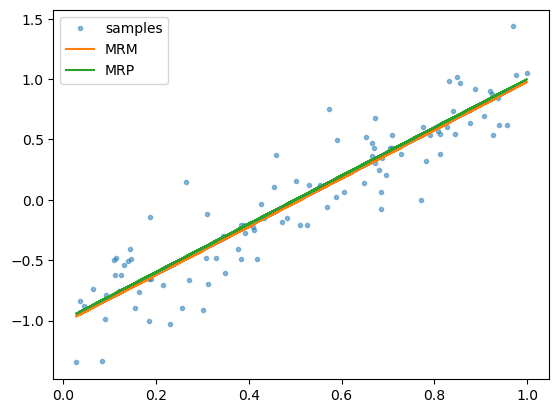

In [57]:
b0,b1 = simple_linear_regression(X,Y)

print(f'Estimador b0: {b0}')
print(f'Estimador b1: {b1}')

fig, ax = plt.subplots()
ax.plot(X, Y, ".", alpha=0.5, label="samples")
ax.plot(X, b0 + b1 * X, label="MRM")
ax.plot(X, f(X), label="MRP")

plt.legend(title="")
plt.show()


In [58]:
m = 10000
estimaciones = []

for i in range(m):
    # las X quedan fijas porque son las muestras, la idea es ver como pueden cambair las estimaciones sobre un mismo grupo muetsral
    epsilon = norm.rvs(loc = 0, scale = sigma, size = n)
    Y = f(X) + epsilon
    b0, b1 = simple_linear_regression(X, Y)
    estimaciones.append((b0,b1))

estimacion = np.array(estimaciones)

Text(0.5, 1.0, 'Distribucion de $\\hat\\beta_1$')

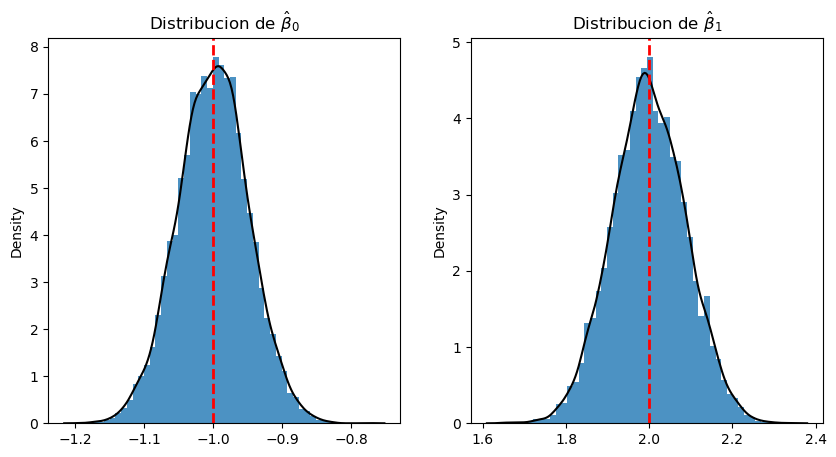

In [59]:
bins = 50

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].hist(estimacion[:,0], density = True, alpha = .8, bins = bins)
sns.kdeplot(estimacion[:,0], ax= ax[0], color = "k")
ax[0].axvline(x=-1, color="r", linestyle="--", linewidth = 2)
ax[0].set_title("Distribucion de $\\hat\\beta_0$")

ax[1].hist(estimacion[:,1], density = True, alpha = .8, bins = bins)
sns.kdeplot(estimacion[:,1], ax= ax[1], color = "k")
ax[1].axvline(x=2, color="r", linestyle="--", linewidth = 2)
ax[1].set_title("Distribucion de $\\hat\\beta_1$")

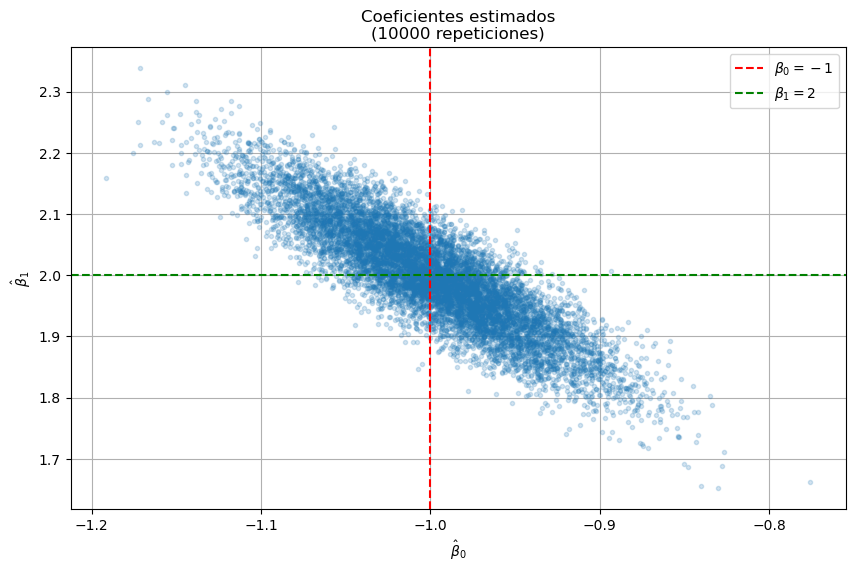

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(estimacion[:, 0], estimacion[:, 1], '.', alpha=0.2)
ax.axvline(x=true_betas[0], color='r', linestyle='--', label=f'$\\beta_0 = {true_betas[0]}$')
ax.axhline(y=true_betas[1], color='g', linestyle='--', label=f'$\\beta_1 = {true_betas[1]}$')

plt.xlabel('$\\hat{\\beta}_0$')
plt.ylabel('$\\hat{\\beta}_1$')
plt.title(f'Coeficientes estimados\n({m} repeticiones)')

plt.legend()
plt.grid(True)
plt.show()

#puedo observar una covarianza/ correlacion negativa

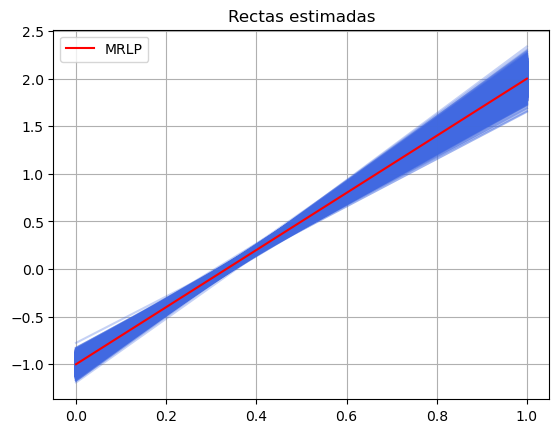

In [65]:
fig, ax = plt.subplots()

# Graficar rectas estimadas
ax.plot(estimacion.T, color='royalblue', alpha=0.3)

# Graficar modelo poblacional
ax.plot(true_betas, color='r', label='MRLP')

plt.title('Rectas estimadas')
plt.legend()
plt.grid(True)
plt.show()
